![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Problemas Clássicos da Computação

## Aprendizado Não Supervisionado e Clusterização

- Professor: Felipe Reis


## Referências

O presente tutorial foi inspirado em:

* Marsland, S. (2014). Machine Learning: An Algorithm Perspective. CRC Press, 2 edition.
* https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
* https://muthu.co/k-means-on-iris-dataset/


## Bibliotecas Necessárias

As bibliotecas necessárias à execução desse tutorial:
* Numpy: https://numpy.org/
* Matplotlib: https://matplotlib.org/
* Pandas: https://pandas.pydata.org/
* Sciki-Learn: https://scikit-learn.org/

---
## Instalação de Bibliotecas

In [31]:
# Execute essa linha para instalação no Google Colab
# Os pacotes numpy e matplotlib não precisam ser instalados
# Caso esteja usando seu computador pessoal, instale o pacote via linha de comando.

!pip install -U pandas
!pip install -U scikit-learn

Requirement already up-to-date: pandas in /home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages (1.2.3)
Requirement already up-to-date: scikit-learn in /home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages (0.24.1)


---
## Importação de bibliotecas 

In [32]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, classification_report, pairwise_distances_argmin_min
from sklearn.datasets import load_iris

---
## Funções Úteis

In [33]:
def split_data(x_data, y_data):
    return train_test_split(
            x_data,
            y_data, 
            test_size = 0.3, #percentual do conjunto de treino
            random_state = 10 #seed random, para resultados semelhantes
    )

In [34]:
def imprime_grafico_iris(data, target, targets_names, dt_column1=0, dt_column2=1):
    plt.figure(figsize=(10, 7))
    colors = ['red', 'green', 'blue']
    
    for color, i, target_name in zip(colors, [0, 1, 2], targets_names):
        x = data[target == i, dt_column1]
        y = data[target == i, dt_column2]
        
        plt.scatter(x, y, alpha=.8, color=color, label=target_name)

    #adiciona legenda e imprime gráfico
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

---
## Íris Datasets

O tutorial utilizará a base de dados Iris Dataset (contém informações sobre a flor Íris), disponível nativamente pela biblioteca Scikit Learn.

Informações sobre as bases de dados:
* Iris Dataset: https://sklearn.org/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

### Iris Dataset

In [35]:
#carrega a base de dados
iris = load_iris()

In [36]:
#convert os dados em um dataframe pandas
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#imprime algumas amostras, para conhecimento da base de dados
print(df['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [37]:
#define colunas do dataframe
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#s_length: corresponde ao comprimento da sépala (parte da flor - https://pt.wikipedia.org/wiki/S%C3%A9pala)
#s_width: corresponde à largura da sépala 
#p_length: corresponde ao comprimento da pétala (parte da flor - https://pt.wikipedia.org/wiki/P%C3%A9tala)
#p_width: corresponde à largura da pétala

In [38]:
#imprime algumas informações do início do dataframe
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [39]:
#imprime algumas informações do fim do dataframe
df.tail()

,s_length,s_width,p_length,p_width,target,species
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica
149,5.9,3.0,5.1,1.8,2.0,virginica


In [40]:
#imprime todos os targets 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



**Imprime gráfico tentando correlacionar o tamanho e largura da sépala com as classes.**

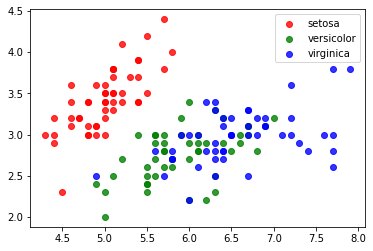

In [41]:
plt.figure()
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    #filtra dados da classe i
    dt_class = iris.data[iris.target == i] 
    
    #plota gráfico de dispersão
    plt.scatter(dt_class[:,0], dt_class[:,1], alpha=.8, color=color, label=target_name)

#adiciona legenda e imprime gráfico
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

### K-means

Podemos utilizar o algoritmo *k-means* para clusterização de elementos.

Observe que o algoritmo é utilizado sem informação de rótulo, uma vez que ele é não supervisionado.

Apesar de utilizarmos o algoritmo não supervisionado, caso tenhamos interesse, podemos utilizar a informação dos rótulos da classe para avaliar o desempenho do algoritmo (caso utilizemos o parâmetro *k=3*).

* Referência: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [42]:
X = iris.data
y = iris.target
kmeans = KMeans(n_clusters=3)
kmeans_fit = kmeans.fit(X)
kmeans_plot = kmeans_fit.transform(X)

#imprime as predições para os conjuntos de dados
kmeans_fp = kmeans.fit_predict(X)
print('Classes')
print(kmeans_fp)
print()

#imprime as posições dos centroides
centroids = kmeans.cluster_centers_
print('Centroides')
print(centroids)
print()

Classes
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]

Centroides
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]



In [43]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Imprime os dados originais e os centroides dos clusters.

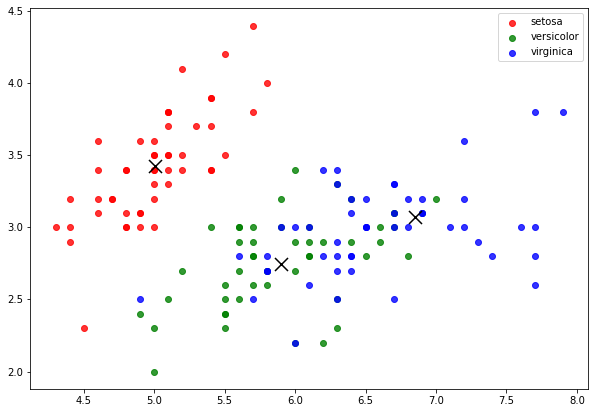

In [44]:
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    #filtra dados da classe i
    dt_class = iris.data[iris.target == i] 
    
    #plota gráfico de dispersão
    plt.scatter(dt_class[:,0], dt_class[:,1], alpha=.8, color=color, label=target_name)

#imprime os centroides
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=170, linewidths=5, color="black")
    
#adiciona legenda e imprime gráfico
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

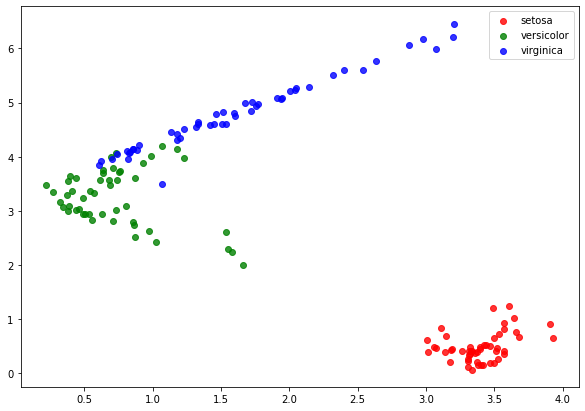

In [45]:
imprime_grafico_iris(kmeans_plot, target=iris.target, targets_names=iris.target_names)

#### Elbow Method

Supondo que não soubessemos a quantidade ideal de clusters (3 classes - 3 clusters), poderíamos utilizar o *Elbow Method* para definição da quantidade ideal de clusters.

Podemos calcular o erro do algoritmo usando o comando *kmeans.inertia_*, que calcula a soma das distâncias quadradas entre as amostras e o centro do cluster mais próximo.

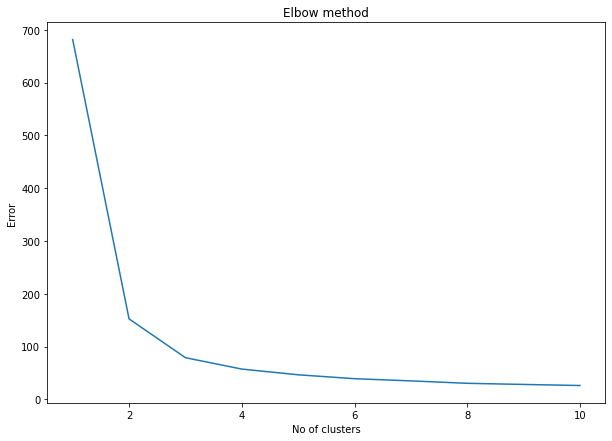

In [46]:
error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    error.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Conforme podemos verificar no gráfico, o número ideal de clusters é de 3 unidades, quando o decrescimento do erro diminui consideravelmente, de modo a ficar quase estável.